## Exploratory Data Analysis
Typically, whenever we are handed a new dataset or problem our first step is to begin to wrap our head around the problem and the data associated with it. This is where some of our previous tools such as the measure of center and dispersion will come in handy. From there, we can continue to dissect the problem by employing various techniques and algorithms to further analyze the dataset from various angles.  
  
  Here we'll investigate a classic dataset concerning the Titanic.

#### First let's import the dataset, see how long it is and preview the first 5 rows

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
print(len(df))
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Then let's quickly get some more info about each of our column features:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### We can also quickly visualize the data:
Along the diagonal are the distributions for each of our variables. Every other cell shows a correlation plot of one feature against another feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fe82860>,
      dtype=object)

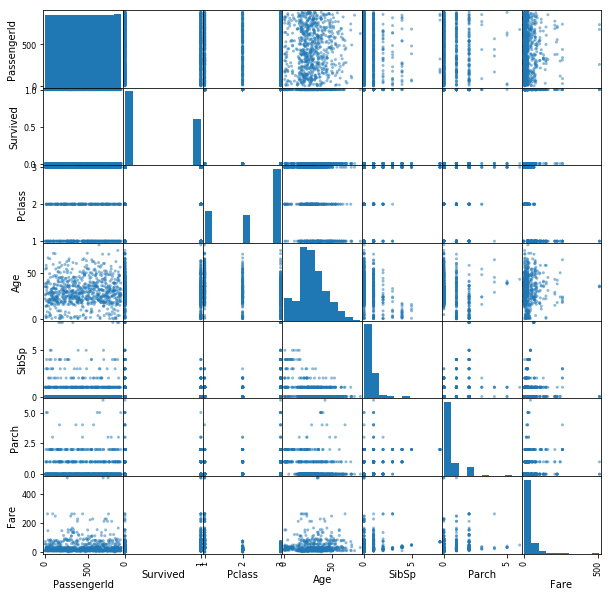

In [6]:
%matplotlib inline
pd.plotting.scatter_matrix(df, figsize=(10,10))

### Correlation and $r^2$, the correlation coefficient
If we want to investigate any of these relationships in more detail, or want to produce scatter plots in general, we can simply create a scatter plot of two variable against each other and numpy's built in **corrcoef** method.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

The correlation coefficient is: [[1.         0.01265822]
 [0.01265822 1.        ]]


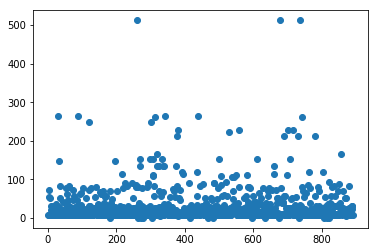

In [9]:
print('The correlation coefficient is:', np.corrcoef(df.PassengerId, df.Fare))
plt.scatter(df.PassengerId, df.Fare)

## Interpolation
Later, when we want to apply various algorithms to our data in order to better understand the dataset, or predict values, we will need to deal with null values. For example, here's how we would fit a basic classification algorithm to try and predict whether or not an individual survived on the Titanic:

In [25]:
from sklearn.linear_model import LogisticRegression
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

logit = LogisticRegression()

X = df.drop('Survived', axis=1).select_dtypes(include=numerics)
y = df['Survived']
logit.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

There's a lot going on there but let's begin with the error message:  
**"Input contains NaN, infinity or a value too large for dtype('float64')".**  
We've received this message because there are null (blank) values.  
So what are we to do?  
  
  One option is to simply fill all the null values with zero, or some other default value. We could also fill null values with the median, mean or another measure of center. Keep in mind however, that doing so will also reduce the variance of our dataset as we are synthetically adding data to the center of the distribution.

In [26]:
#Preview which columns have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
#Fill null Values with zero or a static value
#df = df.fillna(value=0) #Don't run this; we'll try a more dynamic approach below

In [ ]:
## Fill all the null ages with the mean age

In [ ]:
#Fill null values in a column with column mean
df['Age'] = #Your code here